## Case study  - Uber Data Analysis

You have the uber drive data for a driver which captures the differnet aspects of driving behavior. You are a part of the project where you need to grill this data and report the important findings from the grilling and drilling exercise. You also need to provide some useful insights about the trip behaviour of a Uber driver.
Let us try to dive into the data with pandas and numpy by our side!

#### Dataset - 
The dataset contains-
- Start Date - the date and time of the start of the trip
- End Date - the date and time of the end of the trip
- Start Location - staring location of the trip 
- End Location  - location where the trip ended
- Miles Driven  - Total miles driven between the start and the end of the trip
- Purpose of drive - Purpose of the trip (Business, Personal, Meals, Errands, Meetings, Customer Support etc.)

#### Objective-

The aim is to answer some questions about the driver behavior while exploring the data. The questions are around the - 
- Name and number of all the unique start and stop points
- Popular start and stop points
- Rides with same start and stop points
- Starting point from which most miles have been driven
- Start- stop pairs that are most travelled in terms of distance and number of trips
- busiest month in terms of number of drives and miles driven
- busiest day of the week and preferred start hour 
- peak hours
- most frequent trip category
- most frequent trip purpose
- miles driven per category and purpose
- percent composition of business miles vs personal miles
- time spent per category and purpose

----------------------
 #### Concepts To cover 
----------------------
- 1. <a href = #link1>Overview of the data at hand</a>
- 2. <a href = #link3>Filtering Data</a> 
- 3. <a href = #link2>Data profiling and the functions offered by pandas for understanding the data</a>
- 4. <a href = #link4>DateTime operations</a> 




In [1]:
# Import the libraries 
import numpy as np
import pandas as pd
from datetime import datetime
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline

### <a id = "link1"></a>Overview of the data

In [2]:
# Read the Data 
df = pd.read_csv('uberdrive.csv')

# skiprows = 100, nrows - 100
# read_json, read_excel,read_hdf


In [3]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file in

In [4]:
# View first 3 rows of data 
df.head(5) 

START_DATE*       END_DATE* CATEGORY*       START*            STOP*  \
0  1/1/2016 21:11  1/1/2016 21:17  Business  Fort Pierce      Fort Pierce   
1   1/2/2016 1:25   1/2/2016 1:37  Business  Fort Pierce      Fort Pierce   
2  1/2/2016 20:25  1/2/2016 20:38  Business  Fort Pierce      Fort Pierce   
3  1/5/2016 17:31  1/5/2016 17:45  Business  Fort Pierce      Fort Pierce   
4  1/6/2016 14:42  1/6/2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES*         PURPOSE*  
0     5.1   Meal/Entertain  
1     5.0              NaN  
2     4.8  Errand/Supplies  
3     4.7          Meeting  
4    63.7   Customer Visit

In [5]:
df.tail(5)

START_DATE*         END_DATE* CATEGORY*            START*  \
1151  12/31/2016 13:24  12/31/2016 13:42  Business           Kar?chi   
1152  12/31/2016 15:03  12/31/2016 15:38  Business  Unknown Location   
1153  12/31/2016 21:32  12/31/2016 21:50  Business        Katunayake   
1154  12/31/2016 22:08  12/31/2016 23:51  Business           Gampaha   
1155            Totals               NaN       NaN               NaN   

                 STOP*   MILES*        PURPOSE*  
1151  Unknown Location      3.9  Temporary Site  
1152  Unknown Location     16.2         Meeting  
1153           Gampaha      6.4  Temporary Site  
1154         Ilukwatta     48.2  Temporary Site  
1155               NaN  12204.7             NaN

In [6]:
# understand shape and size of data 
print(df.shape)
print(df.size)

(1156, 7)
8092


In [7]:
# get numerical overview of numerical type columns (MILES)
df.describe()         

MILES*
count   1156.000000
mean      21.115398
std      359.299007
min        0.500000
25%        2.900000
50%        6.000000
75%       10.400000
max    12204.700000

### Understanding the missing data 

In [8]:
# check info about data (includes column names, the number of non-null values in it, and data-type for each column.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [9]:
df.count()

START_DATE*    1156
END_DATE*      1155
CATEGORY*      1155
START*         1155
STOP*          1155
MILES*         1156
PURPOSE*        653
dtype: int64

1. PURPOSE column has lots of missing values  
2. Some of the columns have a 1155 records while there are others with 1156, why is that? Lets explore

In [10]:
df.isnull().sum()                                                                                      #.sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [11]:
# Is any of the values in the df null?  (# Useful in writing validation scripts on large number of files )
df.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

Show the records with missing values for column= PURPOSE 

In [12]:
df['PURPOSE*'].isnull()

0       False
1        True
2       False
3       False
4       False
        ...  
1151    False
1152    False
1153    False
1154    False
1155     True
Name: PURPOSE*, Length: 1156, dtype: bool

In [13]:
df[df['PURPOSE*'].isnull()].head(10)
# you can as well do a head() function on this to just view the first n rows  ~

START_DATE*       END_DATE* CATEGORY*            START*  \
1      1/2/2016 1:25   1/2/2016 1:37  Business       Fort Pierce   
32    1/19/2016 9:09  1/19/2016 9:23  Business       Whitebridge   
85    2/9/2016 10:54  2/9/2016 11:07  Personal       Whitebridge   
86    2/9/2016 11:43  2/9/2016 11:50  Personal        Northwoods   
87    2/9/2016 13:36  2/9/2016 13:52  Personal        Tanglewood   
88    2/9/2016 13:58  2/9/2016 14:02  Personal           Preston   
89    2/9/2016 18:55  2/9/2016 19:11  Business              Cary   
102  2/13/2016 23:45  2/14/2016 0:01  Personal     East Elmhurst   
103   2/14/2016 0:50  2/14/2016 1:00  Personal   Jackson Heights   
109   2/16/2016 8:29  2/16/2016 9:34  Business  Unknown Location   

                   STOP*  MILES* PURPOSE*  
1            Fort Pierce     5.0      NaN  
32   Lake Wellingborough     7.2      NaN  
85            Northwoods     5.3      NaN  
86            Tanglewood     3.0      NaN  
87               Preston     5.1      NaN  
88           Whitebridge     1.5      NaN  
89           Morrisville     6.1      NaN  
102      Jackson Heights     2.7      NaN  
103        East Elmhurst     1.8      NaN  
109              Colombo    14.1      NaN

**How many records are non-null  / have values ( in a particular column )?**

In [14]:
df['END_DATE*'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1151    False
1152    False
1153    False
1154    False
1155     True
Name: END_DATE*, Length: 1156, dtype: bool

In [15]:
df[df['END_DATE*'].isnull()]

START_DATE* END_DATE* CATEGORY* START* STOP*   MILES* PURPOSE*
1155      Totals       NaN       NaN    NaN   NaN  12204.7      NaN

In [16]:
# the above record has no entry apart from the miles and can be discarded
# we set the inplace attribute to True so that the row is dropped and the dataframe is updated simultaneously.
df.drop(1155,axis=0,inplace=True)  
# Type command here

In [17]:
df[df['END_DATE*'].isnull()], df.shape
# note that the row is now dropped

(Empty DataFrame
 Columns: [START_DATE*, END_DATE*, CATEGORY*, START*, STOP*, MILES*, PURPOSE*]
 Index: [],
 (1155, 7))

**Note that while we dropped the row above, we will discuss in detail the techniques to handle the missing data in the upcomping weeks.**

### Renaming columns

In [18]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [19]:
#df.START*    

In [20]:
# Approach 1
# Replace the * character from all the  columns
df.columns = df.columns.str.replace("*", "")

# Approach 2
# You can also rename the specific column names 
# df.rename(columns = {'CATEGORY':'CATEGORY*'}, inplace=True)
df.head()

START_DATE        END_DATE  CATEGORY        START             STOP  \
0  1/1/2016 21:11  1/1/2016 21:17  Business  Fort Pierce      Fort Pierce   
1   1/2/2016 1:25   1/2/2016 1:37  Business  Fort Pierce      Fort Pierce   
2  1/2/2016 20:25  1/2/2016 20:38  Business  Fort Pierce      Fort Pierce   
3  1/5/2016 17:31  1/5/2016 17:45  Business  Fort Pierce      Fort Pierce   
4  1/6/2016 14:42  1/6/2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES          PURPOSE  
0    5.1   Meal/Entertain  
1    5.0              NaN  
2    4.8  Errand/Supplies  
3    4.7          Meeting  
4   63.7   Customer Visit

### <a id = "link3"></a>Filtering dataframes
#### Using null values

In [21]:
df.PURPOSE.isnull()

0       False
1        True
2       False
3       False
4       False
        ...  
1150    False
1151    False
1152    False
1153    False
1154    False
Name: PURPOSE, Length: 1155, dtype: bool

In [22]:
# shows the top 5 entries where PURPOSE is null
df[df["PURPOSE"].isnull()].head(5)

START_DATE        END_DATE  CATEGORY        START  \
1    1/2/2016 1:25   1/2/2016 1:37  Business  Fort Pierce   
32  1/19/2016 9:09  1/19/2016 9:23  Business  Whitebridge   
85  2/9/2016 10:54  2/9/2016 11:07  Personal  Whitebridge   
86  2/9/2016 11:43  2/9/2016 11:50  Personal   Northwoods   
87  2/9/2016 13:36  2/9/2016 13:52  Personal   Tanglewood   

                   STOP  MILES PURPOSE  
1           Fort Pierce    5.0     NaN  
32  Lake Wellingborough    7.2     NaN  
85           Northwoods    5.3     NaN  
86           Tanglewood    3.0     NaN  
87              Preston    5.1     NaN

In [23]:
df[["PURPOSE","MILES"]].head(5)

PURPOSE  MILES
0   Meal/Entertain    5.1
1              NaN    5.0
2  Errand/Supplies    4.8
3          Meeting    4.7
4   Customer Visit   63.7


#### Filtering out records based on conditions

In [24]:
df['MILES'] > 30

0       False
1       False
2       False
3       False
4        True
        ...  
1150    False
1151    False
1152    False
1153    False
1154     True
Name: MILES, Length: 1155, dtype: bool

In [25]:
# Conditions within dataframe 
df[df['MILES'] > 30].head()

## Other conditions == or !=

START_DATE         END_DATE  CATEGORY        START  \
4     1/6/2016 14:42   1/6/2016 15:49  Business  Fort Pierce   
36   1/20/2016 13:25  1/20/2016 14:19  Business      Raleigh   
108   2/16/2016 3:21   2/16/2016 4:13  Business   Katunayaka   
232  3/17/2016 12:52  3/17/2016 15:11  Business       Austin   
233  3/17/2016 15:16  3/17/2016 15:58  Business         Katy   

                 STOP  MILES         PURPOSE  
4     West Palm Beach   63.7  Customer Visit  
36               Cary   40.2  Customer Visit  
108  Unknown Location   43.7  Customer Visit  
232              Katy  136.0  Customer Visit  
233           Houston   30.2         Meeting

#### Dropping rows  which have null values

In [26]:
# Let us drop the null values
# We store the null dropped values in the new dataframe to avoid altering the original dataframe
df_dropped = df.dropna()                                            #

In [27]:
# Get the shape of the dataframe after removing the null values
df_dropped.shape          

(653, 7)

In [28]:
df.shape

(1155, 7)

**The filtered dataset with no nulls ( in PURPOSE column )  contains 653 rows of non-null values. Note that a lot of records have been dropped.**

## <a id = "link2"></a>Lets explore the data parameter wise - 

- 1.Destination - (starting and stopping)

- 2.Time - (hour of the day, day of week, month of year)

- 3.Grouping two parameters to get more insights

- 4.Category and Purpose

## 1. Destination
### Understanding  the start and stop points 
###### We will explore the feature through the points below - 
- Name and number of all the unique start and stop points
- Popular start and stop points
- Rides with same start and stop points
- Starting point from which most miles have been driven
- Start- stop pairs that are most travelled in terms of distance

**Let us handle these one by one**

**1. Name and Number of all unique start and stop points**

In [29]:
df.head(5)

START_DATE        END_DATE  CATEGORY        START             STOP  \
0  1/1/2016 21:11  1/1/2016 21:17  Business  Fort Pierce      Fort Pierce   
1   1/2/2016 1:25   1/2/2016 1:37  Business  Fort Pierce      Fort Pierce   
2  1/2/2016 20:25  1/2/2016 20:38  Business  Fort Pierce      Fort Pierce   
3  1/5/2016 17:31  1/5/2016 17:45  Business  Fort Pierce      Fort Pierce   
4  1/6/2016 14:42  1/6/2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES          PURPOSE  
0    5.1   Meal/Entertain  
1    5.0              NaN  
2    4.8  Errand/Supplies  
3    4.7          Meeting  
4   63.7   Customer Visit

In [30]:
# Get the unique starting point, unique destination
# names of unique start points
print(len(df['START'].unique()))                                                              #    

177


In [31]:
print(df['START'].nunique())                                                       # or use can use the nunique function

177


In [32]:
# Get the names of stopping destinations, unique destinations
# Names of unique stopping points
print(df['STOP'].unique())

['Fort Pierce' 'West Palm Beach' 'Palm Beach' 'Cary' 'Morrisville'
 'New York' 'Queens' 'East Harlem' 'NoMad' 'Midtown' 'Midtown East'
 'Hudson Square' 'Lower Manhattan' "Hell's Kitchen" 'Queens County'
 'Gulfton' 'Downtown' 'Houston' 'Jamestown Court' 'Durham' 'Whitebridge'
 'Lake Wellingborough' 'Raleigh' 'Umstead' 'Hazelwood' 'Westpark Place'
 'Meredith Townes' 'Leesville Hollow' 'Apex' 'Chapel Hill'
 'Williamsburg Manor' 'Macgregor Downs' 'Edgehill Farms' 'Northwoods'
 'Tanglewood' 'Preston' 'Walnut Terrace' 'Jackson Heights' 'East Elmhurst'
 'Midtown West' 'Long Island City' 'Jamaica' 'Unknown Location' 'Colombo'
 'Nugegoda' 'Katunayaka' 'Islamabad' 'R?walpindi' 'Noorpur Shahan'
 'Heritage Pines' 'Waverly Place' 'Wayne Ridge' 'Depot Historic District'
 'Weston' 'West University' 'South Congress' 'Arts District'
 'Congress Ave District' 'Red River District' 'The Drag'
 'Convention Center District' 'North Austin' 'Coxville' 'Katy' 'Alief'
 'Sharpstown' 'Sugar Land' 'Galveston' 'Port

In [33]:
print(len(df['STOP'].unique()))            # count of unique stopping points

188


**2a. Identify popular start points - top 10**

In [34]:
df['START'].head()

0    Fort Pierce
1    Fort Pierce
2    Fort Pierce
3    Fort Pierce
4    Fort Pierce
Name: START, dtype: object

In [35]:
df['START'].value_counts().head(10)

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: START, dtype: int64

**2b. Identify popular stop destinations - top 10**

In [36]:
df['STOP'].value_counts().sort_values(ascending = False).head(10)

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: STOP, dtype: int64

In [37]:
df['MILES'].head(5)

0     5.1
1     5.0
2     4.8
3     4.7
4    63.7
Name: MILES, dtype: float64

In [38]:
## Qn - Identify Top 10 Miles ?
df['MILES'].sort_values(ascending = False).head(10)

269    310.3
270    201.0
881    195.9
776    195.6
546    195.3
559    180.2
297    174.2
299    159.3
727    156.9
298    144.0
Name: MILES, dtype: float64

**3.  Are there cases where the start and the stop location are the same  ?**

In [39]:
#Code here
df[df["START"] == df["STOP"]].head(5)

START_DATE        END_DATE  CATEGORY            START             STOP  \
0  1/1/2016 21:11  1/1/2016 21:17  Business      Fort Pierce      Fort Pierce   
1   1/2/2016 1:25   1/2/2016 1:37  Business      Fort Pierce      Fort Pierce   
2  1/2/2016 20:25  1/2/2016 20:38  Business      Fort Pierce      Fort Pierce   
3  1/5/2016 17:31  1/5/2016 17:45  Business      Fort Pierce      Fort Pierce   
5  1/6/2016 17:15  1/6/2016 17:19  Business  West Palm Beach  West Palm Beach   

   MILES          PURPOSE  
0    5.1   Meal/Entertain  
1    5.0              NaN  
2    4.8  Errand/Supplies  
3    4.7          Meeting  
5    4.3   Meal/Entertain

**4.Starting point from which the most miles have been driven**

In [40]:
df.groupby('START')['MILES'].sum().sort_values(ascending = False).head(10)

START
Unknown Location    1976.5
Cary                1791.3
Morrisville          671.7
Raleigh              433.0
Islamabad            401.2
Durham               384.4
Jacksonville         375.2
Latta                310.3
Asheville            287.7
Whitebridge          273.4
Name: MILES, dtype: float64

**5. Find the top10 start stop pair that have the most miles covered between them ever.**

In [41]:
# Let us drop the unknown locations
df2 = df[df['START'] != 'Unknown Location']             # Makes a new dataframe, which don't have "Unknown Location" as starting point
df2.head()

START_DATE        END_DATE  CATEGORY        START             STOP  \
0  1/1/2016 21:11  1/1/2016 21:17  Business  Fort Pierce      Fort Pierce   
1   1/2/2016 1:25   1/2/2016 1:37  Business  Fort Pierce      Fort Pierce   
2  1/2/2016 20:25  1/2/2016 20:38  Business  Fort Pierce      Fort Pierce   
3  1/5/2016 17:31  1/5/2016 17:45  Business  Fort Pierce      Fort Pierce   
4  1/6/2016 14:42  1/6/2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES          PURPOSE  
0    5.1   Meal/Entertain  
1    5.0              NaN  
2    4.8  Errand/Supplies  
3    4.7          Meeting  
4   63.7   Customer Visit

In [42]:
df2 = df2[df2['STOP'] != 'Unknown Location']            # Further updates the df2 dataframe, by removing "Unknown Location" as stopping point
df2.head()

START_DATE        END_DATE  CATEGORY        START             STOP  \
0  1/1/2016 21:11  1/1/2016 21:17  Business  Fort Pierce      Fort Pierce   
1   1/2/2016 1:25   1/2/2016 1:37  Business  Fort Pierce      Fort Pierce   
2  1/2/2016 20:25  1/2/2016 20:38  Business  Fort Pierce      Fort Pierce   
3  1/5/2016 17:31  1/5/2016 17:45  Business  Fort Pierce      Fort Pierce   
4  1/6/2016 14:42  1/6/2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES          PURPOSE  
0    5.1   Meal/Entertain  
1    5.0              NaN  
2    4.8  Errand/Supplies  
3    4.7          Meeting  
4   63.7   Customer Visit

In [43]:
df2.groupby(['START','STOP'])['MILES'].sum()

START          STOP              
Agnew          Agnew                   2.2
               Cory                    4.3
               Renaissance             4.6
Almond         Bryson City            15.2
Apex           Apex                    4.3
                                     ...  
Whitebridge    Wayne Ridge            31.9
               Westpark Place         31.4
               Whitebridge            14.1
               Williamsburg Manor      8.3
Winston Salem  Asheville             133.6
Name: MILES, Length: 343, dtype: float64

In [44]:
# Creating a dataframe with the top 10 most miles covered between a start stop pair
k3 = pd.DataFrame(df2.groupby(['START','STOP'])['MILES'].sum().sort_values(ascending=False).head(10)) 
print(k3)

                           MILES
START        STOP               
Morrisville  Cary          395.7
Cary         Durham        390.0
             Morrisville   380.0
Raleigh      Cary          365.7
Cary         Raleigh       336.5
Durham       Cary          334.4
Latta        Jacksonville  310.3
Cary         Cary          255.9
Jacksonville Kissimmee     201.0
Asheville    Mebane        195.9


In [45]:
k3= k3.reset_index() # flatten the dataframe 
k3

START          STOP  MILES
0   Morrisville          Cary  395.7
1          Cary        Durham  390.0
2          Cary   Morrisville  380.0
3       Raleigh          Cary  365.7
4          Cary       Raleigh  336.5
5        Durham          Cary  334.4
6         Latta  Jacksonville  310.3
7          Cary          Cary  255.9
8  Jacksonville     Kissimmee  201.0
9     Asheville        Mebane  195.9

In [46]:
k3['Start-Stop'] = k3['START'] + ' - ' + k3['STOP']
k3

START          STOP  MILES                Start-Stop
0   Morrisville          Cary  395.7        Morrisville - Cary
1          Cary        Durham  390.0             Cary - Durham
2          Cary   Morrisville  380.0        Cary - Morrisville
3       Raleigh          Cary  365.7            Raleigh - Cary
4          Cary       Raleigh  336.5            Cary - Raleigh
5        Durham          Cary  334.4             Durham - Cary
6         Latta  Jacksonville  310.3      Latta - Jacksonville
7          Cary          Cary  255.9               Cary - Cary
8  Jacksonville     Kissimmee  201.0  Jacksonville - Kissimmee
9     Asheville        Mebane  195.9        Asheville - Mebane

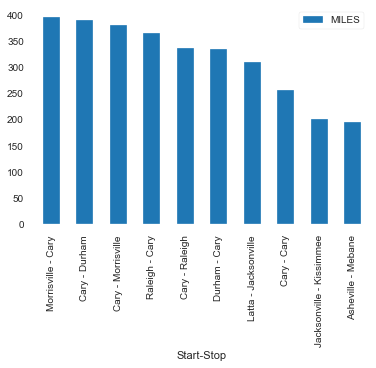

In [47]:
# Plot the Start-Top and Miles with a bar chart
k3[:10].plot.bar(x='Start-Stop',y='MILES')

**The most popular start to destination pair is Morrisville-Cary**

<a id = "link4"></a>
## 2. Start Date - End Date 
### Manipulating date & time objects
#### Lets explore the variables using the below points-
- busiest month in terms of number of drives and miles driven
- busiest day of the week and preferred start hour 
- peak hours

We will create more features for the trip data to be able to cater to above requests

In [48]:
df.head(3)

START_DATE        END_DATE  CATEGORY        START         STOP  MILES  \
0  1/1/2016 21:11  1/1/2016 21:17  Business  Fort Pierce  Fort Pierce    5.1   
1   1/2/2016 1:25   1/2/2016 1:37  Business  Fort Pierce  Fort Pierce    5.0   
2  1/2/2016 20:25  1/2/2016 20:38  Business  Fort Pierce  Fort Pierce    4.8   

           PURPOSE  
0   Meal/Entertain  
1              NaN  
2  Errand/Supplies

In [49]:
now = datetime.now()
now

datetime.datetime(2020, 9, 19, 22, 37, 14, 64207)

In [50]:
year = now.strftime("%Y")
year

'2020'

We will be using the datetime module (  https://docs.python.org/3/library/datetime.html  )

Search for "strftime() and strptime() Format Codes" in the documentation page

In [51]:
df.dtypes                          # Import datetime library

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [52]:
df.tail(5)

START_DATE          END_DATE  CATEGORY             START  \
1150   12/31/2016 1:07   12/31/2016 1:14  Business           Kar?chi   
1151  12/31/2016 13:24  12/31/2016 13:42  Business           Kar?chi   
1152  12/31/2016 15:03  12/31/2016 15:38  Business  Unknown Location   
1153  12/31/2016 21:32  12/31/2016 21:50  Business        Katunayake   
1154  12/31/2016 22:08  12/31/2016 23:51  Business           Gampaha   

                  STOP  MILES         PURPOSE  
1150           Kar?chi    0.7         Meeting  
1151  Unknown Location    3.9  Temporary Site  
1152  Unknown Location   16.2         Meeting  
1153           Gampaha    6.4  Temporary Site  
1154         Ilukwatta   48.2  Temporary Site

In [53]:
# Create columns by converting the start and end date into a datatime format
# You can also over write the same column - but for the sake of understanding the difference in formats, we create new columns
df['start_dt'] = df['START_DATE'].apply(lambda x : datetime.strptime(x, '%m/%d/%Y %H:%M'))
df['end_dt'] = df['END_DATE'].apply(lambda x : datetime.strptime(x, '%m/%d/%Y %H:%M'))

# also define a seperate function and loop through data frame across multiple line - do it in one line

In [54]:
df.head()             # Print first 5 rows of data.

START_DATE        END_DATE  CATEGORY        START             STOP  \
0  1/1/2016 21:11  1/1/2016 21:17  Business  Fort Pierce      Fort Pierce   
1   1/2/2016 1:25   1/2/2016 1:37  Business  Fort Pierce      Fort Pierce   
2  1/2/2016 20:25  1/2/2016 20:38  Business  Fort Pierce      Fort Pierce   
3  1/5/2016 17:31  1/5/2016 17:45  Business  Fort Pierce      Fort Pierce   
4  1/6/2016 14:42  1/6/2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES          PURPOSE            start_dt              end_dt  
0    5.1   Meal/Entertain 2016-01-01 21:11:00 2016-01-01 21:17:00  
1    5.0              NaN 2016-01-02 01:25:00 2016-01-02 01:37:00  
2    4.8  Errand/Supplies 2016-01-02 20:25:00 2016-01-02 20:38:00  
3    4.7          Meeting 2016-01-05 17:31:00 2016-01-05 17:45:00  
4   63.7   Customer Visit 2016-01-06 14:42:00 2016-01-06 15:49:00

In [55]:
df.dtypes             # See how the dtype is different

START_DATE            object
END_DATE              object
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
start_dt      datetime64[ns]
end_dt        datetime64[ns]
dtype: object

In [56]:
# Create more columns by using the inbuilt functionalities of datatime module

df['start_day'] = df['start_dt'].dt.day
df['start_hour'] = df['start_dt'].dt.hour
df['start_month'] = df['start_dt'].dt.month
df['d_of_wk'] = df['start_dt'].dt.dayofweek   # Days encoded as 0-6  ( monday =0, Tue =1 .... )

In [57]:
df.head(5).T

0                    1                    2  \
START_DATE        1/1/2016 21:11        1/2/2016 1:25       1/2/2016 20:25   
END_DATE          1/1/2016 21:17        1/2/2016 1:37       1/2/2016 20:38   
CATEGORY                Business             Business             Business   
START                Fort Pierce          Fort Pierce          Fort Pierce   
STOP                 Fort Pierce          Fort Pierce          Fort Pierce   
MILES                        5.1                    5                  4.8   
PURPOSE           Meal/Entertain                  NaN      Errand/Supplies   
start_dt     2016-01-01 21:11:00  2016-01-02 01:25:00  2016-01-02 20:25:00   
end_dt       2016-01-01 21:17:00  2016-01-02 01:37:00  2016-01-02 20:38:00   
start_day                      1                    2                    2   
start_hour                    21                    1                   20   
start_month                    1                    1                    1   
d_of_wk                        4                    5                    5   

                               3                    4  
START_DATE        1/5/2016 17:31       1/6/2016 14:42  
END_DATE          1/5/2016 17:45       1/6/2016 15:49  
CATEGORY                Business             Business  
START                Fort Pierce          Fort Pierce  
STOP                 Fort Pierce      West Palm Beach  
MILES                        4.7                 63.7  
PURPOSE                  Meeting       Customer Visit  
start_dt     2016-01-05 17:31:00  2016-01-06 14:42:00  
end_dt       2016-01-05 17:45:00  2016-01-06 15:49:00  
start_day                      5                    6  
start_hour                    17                   14  
start_month                    1                    1  
d_of_wk                        1                    2

In [58]:
df['weekday'] = df['start_dt'].apply(lambda x : datetime.strftime(x,'%a'))  # ( or directly convert into the short form)

In [59]:
df.head().T

0                    1                    2  \
START_DATE        1/1/2016 21:11        1/2/2016 1:25       1/2/2016 20:25   
END_DATE          1/1/2016 21:17        1/2/2016 1:37       1/2/2016 20:38   
CATEGORY                Business             Business             Business   
START                Fort Pierce          Fort Pierce          Fort Pierce   
STOP                 Fort Pierce          Fort Pierce          Fort Pierce   
MILES                        5.1                    5                  4.8   
PURPOSE           Meal/Entertain                  NaN      Errand/Supplies   
start_dt     2016-01-01 21:11:00  2016-01-02 01:25:00  2016-01-02 20:25:00   
end_dt       2016-01-01 21:17:00  2016-01-02 01:37:00  2016-01-02 20:38:00   
start_day                      1                    2                    2   
start_hour                    21                    1                   20   
start_month                    1                    1                    1   
d_of_wk                        4                    5                    5   
weekday                      Fri                  Sat                  Sat   

                               3                    4  
START_DATE        1/5/2016 17:31       1/6/2016 14:42  
END_DATE          1/5/2016 17:45       1/6/2016 15:49  
CATEGORY                Business             Business  
START                Fort Pierce          Fort Pierce  
STOP                 Fort Pierce      West Palm Beach  
MILES                        4.7                 63.7  
PURPOSE                  Meeting       Customer Visit  
start_dt     2016-01-05 17:31:00  2016-01-06 14:42:00  
end_dt       2016-01-05 17:45:00  2016-01-06 15:49:00  
start_day                      5                    6  
start_hour                    17                   14  
start_month                    1                    1  
d_of_wk                        1                    2  
weekday                      Tue                  Wed

In [60]:
df['cal_month'] =  df['start_dt'].apply(lambda x : datetime.strftime(x,'%b'))

In [61]:
df.head().T

0                    1                    2  \
START_DATE        1/1/2016 21:11        1/2/2016 1:25       1/2/2016 20:25   
END_DATE          1/1/2016 21:17        1/2/2016 1:37       1/2/2016 20:38   
CATEGORY                Business             Business             Business   
START                Fort Pierce          Fort Pierce          Fort Pierce   
STOP                 Fort Pierce          Fort Pierce          Fort Pierce   
MILES                        5.1                    5                  4.8   
PURPOSE           Meal/Entertain                  NaN      Errand/Supplies   
start_dt     2016-01-01 21:11:00  2016-01-02 01:25:00  2016-01-02 20:25:00   
end_dt       2016-01-01 21:17:00  2016-01-02 01:37:00  2016-01-02 20:38:00   
start_day                      1                    2                    2   
start_hour                    21                    1                   20   
start_month                    1                    1                    1   
d_of_wk                        4                    5                    5   
weekday                      Fri                  Sat                  Sat   
cal_month                    Jan                  Jan                  Jan   

                               3                    4  
START_DATE        1/5/2016 17:31       1/6/2016 14:42  
END_DATE          1/5/2016 17:45       1/6/2016 15:49  
CATEGORY                Business             Business  
START                Fort Pierce          Fort Pierce  
STOP                 Fort Pierce      West Palm Beach  
MILES                        4.7                 63.7  
PURPOSE                  Meeting       Customer Visit  
start_dt     2016-01-05 17:31:00  2016-01-06 14:42:00  
end_dt       2016-01-05 17:45:00  2016-01-06 15:49:00  
start_day                      5                    6  
start_hour                    17                   14  
start_month                    1                    1  
d_of_wk                        1                    2  
weekday                      Tue                  Wed  
cal_month                    Jan                  Jan

**Now let us answer the questions above.**
<br>
<br>
**1. Busiest month in terms of number of miles**

In [62]:
df.groupby('cal_month').mean()['MILES'].sort_values(ascending = False)                                     # mean()   

cal_month
Apr    20.611111
Oct    17.075472
Sep    16.716667
Mar    14.990265
Jul    10.933929
Aug    10.041353
Jan     8.408197
Feb     7.897391
Jun     7.803704
May     7.424490
Dec     6.721233
Nov     6.695902
Name: MILES, dtype: float64

In [63]:
df.groupby('cal_month').size().sort_values(ascending = False)                             

cal_month
Dec    146
Aug    133
Nov    122
Feb    115
Mar    113
Jul    112
Jun    108
Oct    106
Jan     61
Apr     54
May     49
Sep     36
dtype: int64

**2. Busiest day in terms of number of rides**

In [64]:
# Which day did he get most drives? 
df.groupby(['weekday']).size()                                                # size vs count,

weekday
Fri    206
Mon    174
Sat    150
Sun    148
Thu    154
Tue    176
Wed    147
dtype: int64

**3. Peak hours (and estiamted preferred time to start) ?**

In [65]:
df.groupby('start_hour').size()             # The number of trips started for each hour.

start_hour
0     19
1      5
2      2
3      3
5      4
6      4
7     13
8     35
9     51
10    65
11    72
12    77
13    94
14    89
15    98
16    88
17    95
18    94
19    68
20    71
21    51
22    31
23    26
dtype: int64

In [66]:
df_hours = pd.DataFrame(df.groupby('start_hour').size())
df_hours.reset_index(inplace=True)
df_hours.head(5)

start_hour   0
0           0  19
1           1   5
2           2   2
3           3   3
4           5   4

In [67]:
df_hours.columns=['start_hour','Rides'] 
df_hours

start_hour  Rides
0            0     19
1            1      5
2            2      2
3            3      3
4            5      4
5            6      4
6            7     13
7            8     35
8            9     51
9           10     65
10          11     72
11          12     77
12          13     94
13          14     89
14          15     98
15          16     88
16          17     95
17          18     94
18          19     68
19          20     71
20          21     51
21          22     31
22          23     26

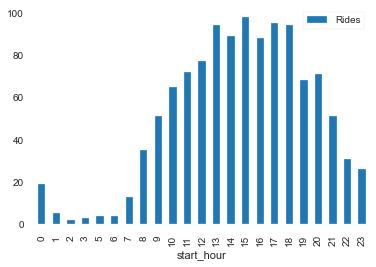

In [68]:
# Plot Function
df_hours.plot.bar(x='start_hour',y='Rides')

**This looks like an interesting data.** <br>
**Looks like the driver mostly starts the trip around 9-10 and the peak hours seem to be between 12- 5 PM**


#### For practice - figure out the trips that are starting and ending at the same time (0 minutes elapsed).<br>
The first step is in the cell below. Try to figure out the rest of the steps after this session. 
<br>
<i>Solutions will be shared through a notebook.</i>

In [69]:
df['diff'] = (df['end_dt'] - df['start_dt'])

In [70]:
df['diff'].describe

<bound method NDFrame.describe of 0      00:06:00
1      00:12:00
2      00:13:00
3      00:14:00
4      01:07:00
         ...   
1150   00:07:00
1151   00:18:00
1152   00:35:00
1153   00:18:00
1154   01:43:00
Name: diff, Length: 1155, dtype: timedelta64[ns]>

In [71]:
df['diff_hr'] = df['diff'].astype('timedelta64[h]')
df['diff_min'] = df['diff'].astype('timedelta64[m]')

In [72]:
df['diff_hr'].describe

<bound method NDFrame.describe of 0       0.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
1150    0.0
1151    0.0
1152    0.0
1153    0.0
1154    1.0
Name: diff_hr, Length: 1155, dtype: float64>

In [73]:
df['diff_min'].describe

<bound method NDFrame.describe of 0         6.0
1        12.0
2        13.0
3        14.0
4        67.0
        ...  
1150      7.0
1151     18.0
1152     35.0
1153     18.0
1154    103.0
Name: diff_min, Length: 1155, dtype: float64>

This creates a timedelta datatype

Find the date time units in  https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html

search for 'Datetime Units'

#### For practice- Exploring existing features to create new ones - Speed 
- Open for all of you to explore and figure out what all can be understood and derived from this feature

In [74]:
#Calculate Spped
df['Duration_hours'] = df['diff_min']/60
df['Speed'] = df['MILES'] / df['Duration_hours']
df['Speed'].describe()

count    1155.000000
mean             inf
std              NaN
min         3.917355
25%        14.888276
50%        21.000000
75%        28.569805
max              inf
Name: Speed, dtype: float64

In [75]:
# Remove inf columns - function used np.isinf(x)
df['Speed'] =  df['Speed'].apply(lambda x : 0 if np.isinf(x) else x)

In [76]:
df['Speed'].describe()

count    1155.000000
mean       26.714858
std        43.132182
min         0.000000
25%        14.802597
50%        21.000000
75%        28.363636
max       906.000000
Name: Speed, dtype: float64

## 4. Category & Purpose
#### Explore the category and the purpose of the trips through
- Most frequent trip category
- Most frequent trip purpose
- Miles driven per category and purpose
- Percent composition of business miles vs personal miles
- time spent per category and purpose

**1. Most frequent trip category**

In [77]:
df['CATEGORY'].value_counts()

Business    1078
Personal      77
Name: CATEGORY, dtype: int64

**Most trips are in the business category**

**2. Most frequent Purpose**

In [78]:
#Purpose
df['PURPOSE'].value_counts(normalize=True)                                                    #normalize=True

Meeting            0.286371
Meal/Entertain     0.245023
Errand/Supplies    0.196018
Customer Visit     0.154671
Temporary Site     0.076570
Between Offices    0.027565
Moving             0.006126
Airport/Travel     0.004594
Charity ($)        0.001531
Commute            0.001531
Name: PURPOSE, dtype: float64

**Most trips are for meetings**

In [79]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'start_dt', 'end_dt', 'start_day', 'start_hour',
       'start_month', 'd_of_wk', 'weekday', 'cal_month', 'diff', 'diff_hr',
       'diff_min', 'Duration_hours', 'Speed'],
      dtype='object')

In [80]:
#Average distance traveled for each activity
df.groupby('PURPOSE').mean()['MILES'].sort_values(ascending = False)

PURPOSE
Commute            180.200000
Customer Visit      20.688119
Meeting             15.247594
Charity ($)         15.100000
Between Offices     10.944444
Temporary Site      10.474000
Meal/Entertain       5.698125
Airport/Travel       5.500000
Moving               4.550000
Errand/Supplies      3.968750
Name: MILES, dtype: float64

**Now lets try to answer some questions from this data.**

**Question3**: How many miles were driven per category and purpose ?

**Question4**: What is percentage of business miles vs personal?

**Question5**: How much time was spend for drives per category and purpose?  - <i>for practice: you will need to create a time difference variable - answers will be shared through a notebook</i>


In [81]:
#Question3: How many miles were driven per purpose ?
df.groupby('PURPOSE').sum()['MILES']

PURPOSE
Airport/Travel       16.5
Between Offices     197.0
Charity ($)          15.1
Commute             180.2
Customer Visit     2089.5
Errand/Supplies     508.0
Meal/Entertain      911.7
Meeting            2851.3
Moving               18.2
Temporary Site      523.7
Name: MILES, dtype: float64

In [82]:
#Question3: How many miles were driven per category ?
df.groupby('CATEGORY').sum()['MILES']

CATEGORY
Business    11487.0
Personal      717.7
Name: MILES, dtype: float64

In [83]:
#Question4: What is percentage of business miles vs personal?
df1 = df.groupby('CATEGORY').agg({'MILES':'sum','Speed':'mean'})    ## add speed perhaps

In [84]:
df1

MILES      Speed
CATEGORY                    
Business  11487.0  27.138324
Personal    717.7  20.786331

In [85]:
df1.apply(lambda x: x/x.sum()*100).rename(columns = {'MILES':'% of Miles','Speed':'% of Avg Speed'})

% of Miles  % of Avg Speed
CATEGORY                            
Business   94.119479       56.627061
Personal    5.880521       43.372939

## Pandas Profiling

In [86]:
pandas_profiling.ProfileReport(df) # To show here
#Add to html file
#profile= pandas_profiling.ProfileReport(df)
#profile.to_file('./output.html')

## Summary  -
Through this exercise, we tried to check out the data analysis toolkit offered by pandas. We went to explore variables at hand, use groupby, implement datatime manipulation, explored possibility to create new features and various other operations on pandas dataframe.
We also had a sneak peek into the upcoming week's topic of visualization.

Learners are recommended to explore further on this building on the points discussed in the notebook.
Happy Learning!